In [21]:
import pandas as pd
df=pd.read_csv('bhp.csv')
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4,231.00,5,6689
13196,other,4 BHK,3600.0,5,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4,488.00,4,10407


In [22]:
df.shape

(13200, 7)

In [23]:
max_thresold,min_thresold = df.price_per_sqft.quantile([0.999,0.001])
max_thresold,min_thresold

(50959.36200000098, 1366.184)

In [24]:
df1 = df[(df.price_per_sqft<max_thresold)&(df.price_per_sqft>min_thresold)]

In [25]:
df1.shape

(13172, 7)

In [26]:
upper_limit = df1.price_per_sqft.mean() + 4*df1.price_per_sqft.std()
upper_limit

23227.73653589432

In [27]:
lower_limit = df1.price_per_sqft.mean() - 4*df1.price_per_sqft.std()
lower_limit

-9900.429065502582

In [28]:
df2 = df1[(df1.price_per_sqft<upper_limit)&(df1.price_per_sqft>lower_limit)]
df2.shape

(13047, 7)

In [29]:
df1.shape[0] - df2.shape[0]

125

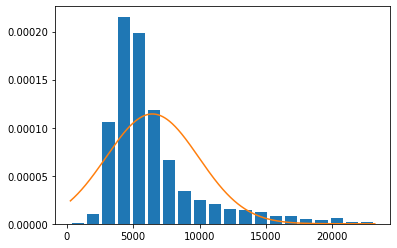

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

plt.hist(df2.price_per_sqft,bins=20,rwidth=0.8,density=True)
rng = np.arange(df2.price_per_sqft.min(),df2.price_per_sqft.max(),0.1)
plt.plot(rng,norm.pdf(rng,df2.price_per_sqft.mean(),df2.price_per_sqft.std()))

In [16]:
df1['zscore'] = (df1.price_per_sqft - df1.price_per_sqft.mean()) / df1.price_per_sqft.std()

C:\Users\dhruv\AppData\Local\Temp\ipykernel_16916\3829309969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['zscore'] = (df1.price_per_sqft - df1.price_per_sqft.mean()) / df1.price_per_sqft.std()


In [17]:
df3 = df1[(df1.zscore<4)&(df1.zscore>-4)]

In [18]:
df3.shape

(13047, 8)

In [31]:
df1.shape[0]-df3.shape[0]

125